# Practical Work: Mountain Bike suspension



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
%matplotlib nbagg

In [21]:
class Suspension:
    """
    Mountain Bike Suspension.
    
    Inputs:
    * m: mass
    * k: suspension spring stiffness
    * d: damping
    * ddotxd: drive acceleration [m/s**2]
    """
    def __init__(self, m = 1., k = 1., d = 0., g = 9.81, ddotxd = None):
        self.m = m
        self.k = k
        self.d = d
        self.g  = g
        if ddotxd == None:
             def ddotxd(t):
                    return 0*t
        self.ddotxd = ddotxd
        self.solution = pd.DataFrame(columns = ["t", "x", "dotx"],
                                     data = [[0., 0., 0.]])
    
   
    def derivative(self, X, t):
        """
        ODE
        """
        m = self.m
        k = self.k
        d = self.d
        g  = self.g
        ddotxd = self.ddotxd(t)
        x, dotx = X
        ddotx = -k/m*x - d/m*dotx - ddotxd - g
        return np.array([dotx, ddotx])
    
    def solve(self, nt = 100, dt = 1.e-2):
        """
        Solves the equation
        """
        X0 = self.solution.iloc[-1][["x", "dotx"]].values
        t0 = self.solution.t.values[-1]
        t  =  np.arange(nt+1) * dt + t0
        sol = odeint(self.derivative, X0, t)
        new_data = pd.DataFrame(columns = ["t", "x", "dotx"],
            data = np.array([t, sol[:, 0], sol[:, 1]]).T)
        self.solution = pd.concat([self.solution, new_data], 
                                  ignore_index = True)
        

In [30]:

def ddotxd(t):
    f = 1.
    return .2* np.sin(2. * np.pi *f * t)
s = Suspension(d = 1., k=1000., ddotxd = ddotxd)
s.solve(nt = 1000, dt = 1.e-2)
s.solution

,t,x,dotx
0,0.00,0.000000,0.000000
1,0.00,0.000000,0.000000
2,0.01,-0.000485,-0.096055
3,0.02,-0.001887,-0.181799
4,0.03,-0.004059,-0.248874
5,0.04,-0.006780,-0.290846
6,0.05,-0.009778,-0.303820
7,0.06,-0.012756,-0.286805
8,0.07,-0.015421,-0.241773
9,0.08,-0.017514,-0.173444


<IPython.core.display.Javascript object>


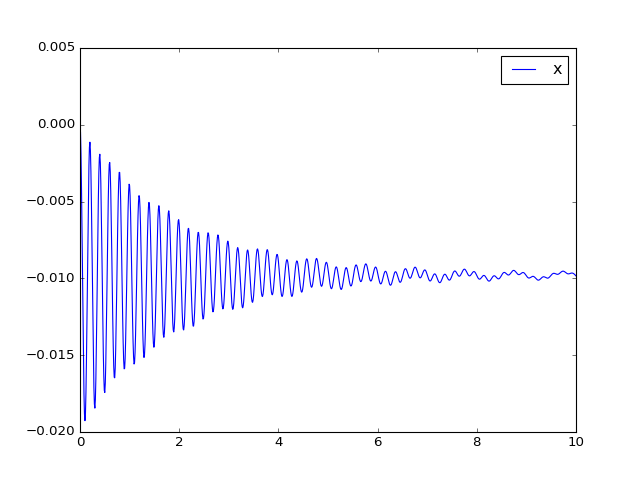

In [31]:
d = s.solution
plt.figure()
plt.plot(d.t, d.x, label = "x")
#plt.plot(d.t, d.x2, label = "x2")
#plt.plot(d.t, s.xd(d.t), label = "ddotxd")
plt.legend()
plt.show()

In [14]:
d.xs

<bound method NDFrame.xs of           t             x      dotx
0      0.00  0.000000e+00  0.000000
1      0.00  0.000000e+00  0.000000
2      0.01 -2.239388e-07 -0.000063
3      0.02 -1.681800e-06 -0.000251
4      0.03 -5.651972e-06 -0.000564
5      0.04 -1.336786e-05 -0.001000
6      0.05 -2.605428e-05 -0.001558
7      0.06 -4.491664e-05 -0.002235
8      0.07 -7.113450e-05 -0.003028
9      0.08 -1.058579e-04 -0.003935
10     0.09 -1.502026e-04 -0.004952
11     0.10 -2.052450e-04 -0.006074
12     0.11 -2.720187e-04 -0.007297
13     0.12 -3.515092e-04 -0.008617
14     0.13 -4.446520e-04 -0.010027
15     0.14 -5.523256e-04 -0.011522
16     0.15 -6.753479e-04 -0.013095
17     0.16 -8.144776e-04 -0.014742
18     0.17 -9.704066e-04 -0.016454
19     0.18 -1.143759e-03 -0.018225
20     0.19 -1.335087e-03 -0.020048
21     0.20 -1.544871e-03 -0.021915
22     0.21 -1.773515e-03 -0.023819
23     0.22 -2.021348e-03 -0.025752
24     0.23 -2.288617e-03 -0.027705
25     0.24 -2.575493e-03 -0.029672
